In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import signal
import pywt
#import hfda
#import ewtpy
import pywt as py
from scipy.signal import hilbert, chirp, savgol_filter,find_peaks, peak_prominences
import statistics
#from PyEMD import EMD
import csv
import skinematics
import math
from time import sleep
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
from skinematics.sensors.xio_ngimu import NGIMU
from skinematics.sensors.manual import MyOwnSensor
import argparse
from datetime import date
from scipy import constants
import sys
from scipy.signal import savgol_filter as sg
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import integrate
import traja

In [2]:
#moving average function
def moving_avg(x, n):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[n:] - cumsum[:-n]) / float(n)

In [6]:
os.listdir(r'C:\Users\harsh\Zoho WorkDrive (solinas integrity)\Data Analysis and Software Development\Iglobus\Data\Iglobus_localization_data')

['BlueCoin_Log_N000.csv',
 'BlueCoin_Log_N000_1roll.csv',
 'BlueCoin_Log_N000_acc_deacc_upside_down.csv',
 'BlueCoin_Log_N000_rotating_without_moving.csv',
 'BlueCoin_Log_N000_side_rolling.csv',
 'BlueCoin_Log_N000_straight_1m.csv',
 'BlueCoin_Log_N000_up_down.csv',
 'BlueCoin_Log_N000_vibrating.csv',
 'BlueCoin_Log_N000_zigzag_backforth.csv',
 'BlueCoin_Log_N001.csv',
 'BlueCoin_Log_N001_fastroll.csv',
 'BlueCoin_Log_N001_longdist.csv',
 'BlueCoin_Log_N001_long_parabola.csv',
 'BlueCoin_Log_N001_rolling_1m.csv',
 'BlueCoin_Log_N001_zigzag_roll.csv',
 'BlueCoin_Log_N002.csv',
 'BlueCoin_Log_N002_zigzag_1m.csv',
 'BlueCoin_Log_N003.csv',
 'BlueCoin_Log_N004.csv']

In [21]:
path = r'C:\Users\harsh\Zoho WorkDrive (solinas integrity)\Data Analysis and Software Development\Iglobus\Data\Iglobus_localization_data'
file = '\\BlueCoin_Log_N000_acc_deacc_upside_down.csv'

In [22]:
data_label = pd.read_csv(path + file, encoding= 'unicode_escape')

In [23]:
test_data1 = data_label.drop(columns= 'Unnamed: 12')

Text(0, 0.5, 'Force [mg]')

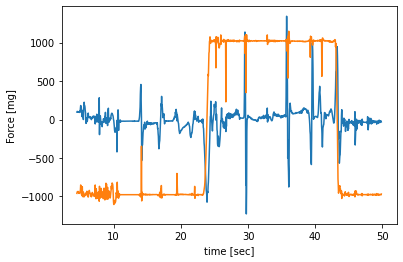

In [29]:
plt.plot(test_data1['T [ms]']/1000,test_data1['AccX [mg]'])
plt.plot(test_data1['T [ms]']/1000,test_data1['AccZ [mg]'])

plt.xlabel('time [sec]')
plt.ylabel('Force [mg]')

In [40]:
x = test_data1['AccX [mg]']
y = test_data1['AccY [mg]']
z = test_data1['AccZ [mg]']

In [51]:
vary_x = x.rolling(10).var()

In [52]:
pred = []
for i in range(len(x)):
    if vary_x[i] >100000:
        pred.append('collision')
    else:
        pred.append('smooth')

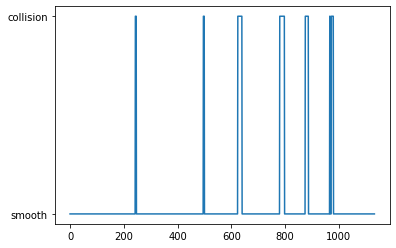

In [50]:
plt.plot(pred)

Text(0, 0.5, 'Force [g]')

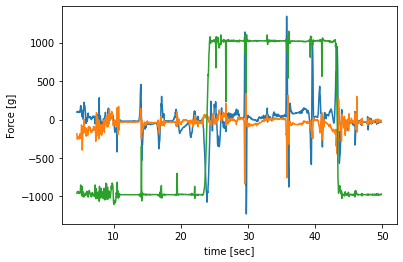

In [24]:
plt.plot(test_data1['T [ms]']/1000,test_data1['AccX [mg]'])
plt.plot(test_data1['T [ms]']/1000,test_data1['AccY [mg]'])
plt.plot(test_data1['T [ms]']/1000,test_data1['AccZ [mg]'])
plt.xlabel('time [sec]')
plt.ylabel('Force [g]')

In [13]:
test_data = test_data1

In [14]:
test_data

,T [ms],AccX [mg],AccY [mg],AccZ [mg],GyroX [mdps],GyroY [mdps],GyroZ [mdps],MagX [mgauss],MagY [mgauss],MagZ [mgauss],P [mB],T [°C]
0,67263,-17,-49,-979,16870,-7070,-1680,-72,-195,-28,1014.35,37.62
1,67303,-26,-32,-964,10150,-5950,-420,-76,-201,-24,1014.34,37.63
2,67343,-29,-35,-977,9660,-9660,-6230,-78,-208,-25,1014.35,37.63
3,67383,-31,-53,-970,6930,-6370,-4620,-73,-216,-27,1014.28,37.63
4,67423,-46,-38,-987,3360,-4550,-2170,-72,-213,-25,1014.34,37.63
...,...,...,...,...,...,...,...,...,...,...,...,...
581,90503,67,-195,-944,2170,6580,5740,-174,-4,262,1014.31,38.48
582,90543,6,-208,-960,4340,2310,12390,-175,-10,265,1014.30,38.48
583,90583,55,-189,-958,5950,8190,15890,-178,-1,261,1014.36,38.49
584,90623,28,-233,-942,7770,2170,15050,-184,1,265,1014.34,38.50


Text(0.5, 1.0, 'angular velocity')

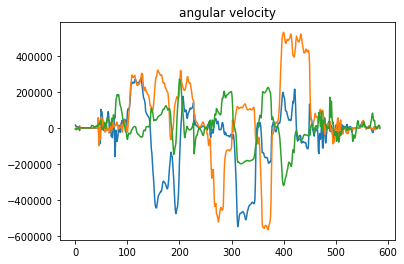

In [16]:
plt.plot(test_data['GyroX [mdps]'])
plt.plot(test_data['GyroY [mdps]'])
plt.plot(test_data['GyroZ [mdps]'])
plt.title('angular velocity')

In [83]:
accX = np.array(test_data['AccX [mg]'])
accY = np.array(test_data['AccY [mg]'])
accZ = np.array(test_data['AccZ [mg]'])
gyroX = np.array(test_data['GyroX [mdps]'])
gyroY = np.array(test_data['GyroY [mdps]'])
gyroZ = np.array(test_data['GyroZ [mdps]'])
magX = np.array(test_data['MagX [mgauss]'])
magY = np.array(test_data['MagY [mgauss]'])
magZ = np.array(test_data['MagZ [mgauss]'])

In [84]:
from PyEMD import EMD

In [85]:
emd = EMD()
IMF_accX = emd(accX)
IMF_accY = emd(accY)
IMF_accZ = emd(accZ)
IMF_gyroX = emd(gyroX)
IMF_gyroY = emd(gyroY)
IMF_gyroZ = emd(gyroZ)

In [86]:
'''accX = IMF_accX[3]
accY = IMF_accY[3]
accZ = IMF_accZ[3]
gyroX = IMF_gyroX[3]
gyroY = IMF_gyroY[3]
gyroZ = IMF_gyroZ[3]'''

'accX = IMF_accX[3]\naccY = IMF_accY[3]\naccZ = IMF_accZ[3]\ngyroX = IMF_gyroX[3]\ngyroY = IMF_gyroY[3]\ngyroZ = IMF_gyroZ[3]'

Text(0.5, 1.0, 'IMF 3')

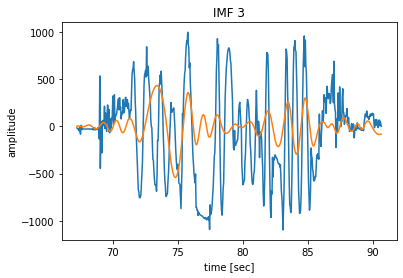

In [91]:
plt.plot(test_data['T [ms]']/1000,accX)
plt.plot(test_data['T [ms]']/1000,IMF_accX[3])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 3')

Text(0.5, 1.0, 'IMF 2')

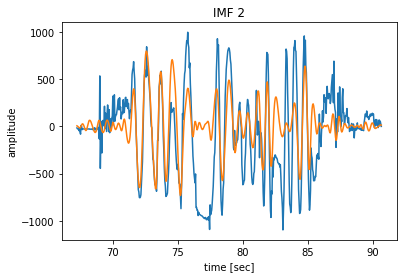

In [92]:
plt.plot(test_data['T [ms]']/1000,accX)
plt.plot(test_data['T [ms]']/1000,IMF_accX[2])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 2')

Text(0.5, 1.0, 'IMF 1')

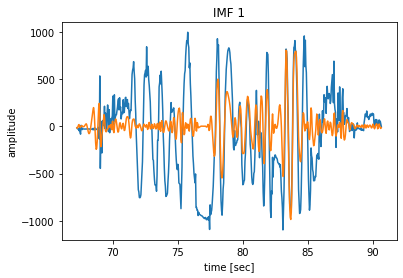

In [93]:
plt.plot(test_data['T [ms]']/1000,accX)
plt.plot(test_data['T [ms]']/1000,IMF_accX[1])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 1')

Text(0.5, 1.0, 'IMF 0')

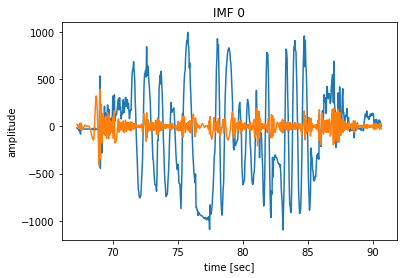

In [94]:
plt.plot(test_data['T [ms]']/1000,accX)
plt.plot(test_data['T [ms]']/1000,IMF_accX[0])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 0')

In [ ]:
plt.plot(test_data1['T [ms]']/1000,test_data1['AccX [mg]'])
plt.plot(test_data1['T [ms]']/1000,test_data1['AccY [mg]'])
plt.plot(test_data1['T [ms]']/1000,test_data1['AccZ [mg]'])
plt.xlabel('time [sec]')
plt.ylabel('Force [g]')

In [24]:
coeffs1 = py.dwt(accX, 'haar')#Here we are decomposing using 3-D wavelet. sym4 wavelet is used here but one can change

In [25]:
coeffs = py.wavedec(accX, 'haar', level=4)
cA4, cD4, cD3, cD2, cD1 = coeffs

Text(0.5, 1.0, 'wavelet 1 deco')

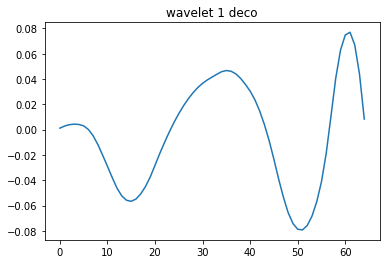

In [70]:
plt.plot(cD1)
plt.title('wavelet 1 deco')

Text(0.5, 1.0, 'wavelet 4 deco')

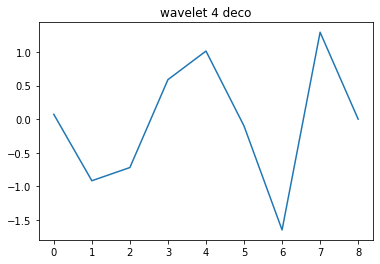

In [71]:
plt.plot(cD4)
plt.title('wavelet 4 deco')

In [72]:
accX = savgol_filter(np.array(test_data['AccX [mg]']),5,2)
accY = savgol_filter(np.array(test_data['AccY [mg]']),5,2)
accZ = savgol_filter(np.array(test_data['AccZ [mg]']),5,2)
gyroX = savgol_filter(np.array(test_data['GyroX [mdps]']),5,2)
gyroY = savgol_filter(np.array(test_data['GyroY [mdps]']),5,2)
gyroZ = savgol_filter(np.array(test_data['GyroZ [mdps]']),5,2)

Text(0.5, 0, 'time [sec]')

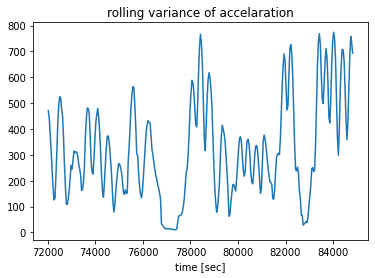

In [23]:
plt.plot(test_data['T [ms]'],test_data['AccX [mg]'].rolling(10).std())
plt.title('rolling variance of accelaration')
plt.xlabel('time [sec]')

Text(0, 0.5, 'radians/sec^2')

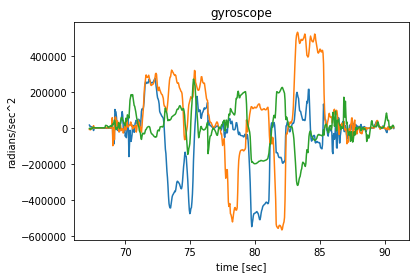

In [104]:
plt.plot(test_data['T [ms]']/1000,test_data['GyroX [mdps]'])
plt.plot(test_data['T [ms]']/1000,test_data['GyroY [mdps]'])
plt.plot(test_data['T [ms]']/1000,test_data['GyroZ [mdps]'])
plt.title('gyroscope')
plt.xlabel('time [sec]')
plt.ylabel('radians/sec^2')

In [105]:
emd = EMD()
IMFs = emd(gyroX)

Text(0.5, 1.0, 'IMF 3 ang_vel')

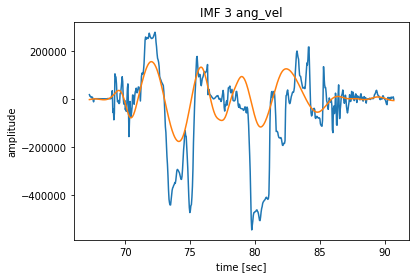

In [106]:
plt.plot(test_data['T [ms]']/1000,gyroX)
plt.plot(test_data['T [ms]']/1000,IMFs[3])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 3 ang_vel')

Text(0.5, 1.0, 'IMF 3 ang_vel')

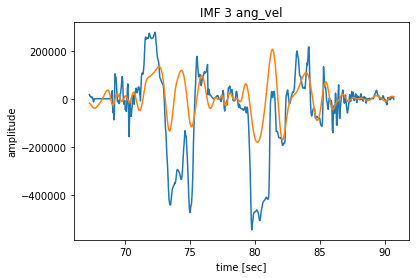

In [107]:
plt.plot(test_data['T [ms]']/1000,gyroX)
plt.plot(test_data['T [ms]']/1000,IMFs[2])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 2 ang_vel')

Text(0.5, 1.0, 'IMF 1 ang_vel')

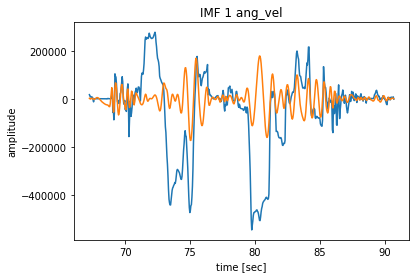

In [108]:
plt.plot(test_data['T [ms]']/1000,gyroX)
plt.plot(test_data['T [ms]']/1000,IMFs[1])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 1 ang_vel')

Text(0.5, 1.0, 'IMF 0 ang_vel')

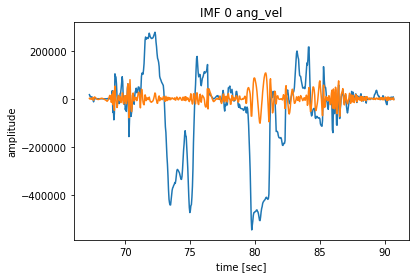

In [109]:
plt.plot(test_data['T [ms]']/1000,gyroX)
plt.plot(test_data['T [ms]']/1000,IMFs[0])
plt.xlabel('time [sec]')
plt.ylabel('amplitude')
plt.title('IMF 0 ang_vel')

Text(0.5, 0, 'time [sec]')

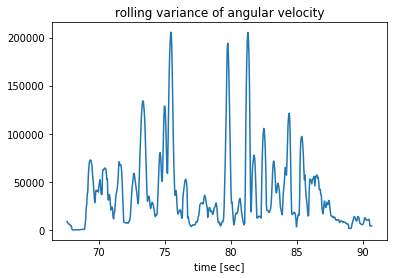

In [110]:
plt.plot(test_data['T [ms]']/1000,test_data['GyroX [mdps]'].rolling(10).std())
plt.title('rolling variance of angular velocity')
plt.xlabel('time [sec]')

In [111]:
coeffs = py.wavedec(gyroX, 'db1', level=4)
cA4, cD4, cD3, cD2, cD1 = coeffs

Text(0.5, 1.0, 'wavelet 1 deco gyro')

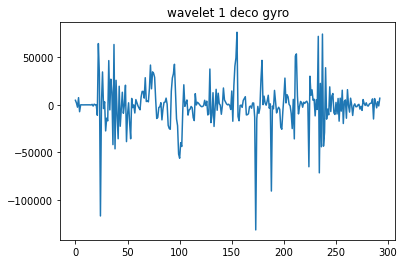

In [112]:
plt.plot(cD1)
plt.title('wavelet 1 deco gyro')

Text(0.5, 1.0, 'wavelet 4 deco gyro')

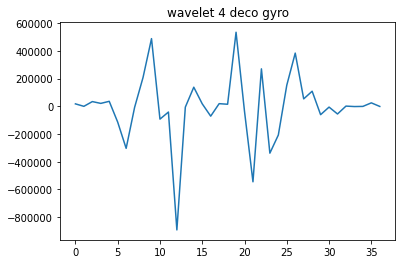

In [113]:
plt.plot(cD4)
plt.title('wavelet 4 deco gyro')

In [114]:
acc = []
gyro = []
mag = []

acc.append(accX)
acc.append(accY)
acc.append(accZ)

gyro.append(gyroX)
gyro.append(gyroY)
gyro.append(gyroZ)

mag.append(magX)
mag.append(magY)
mag.append(magZ)

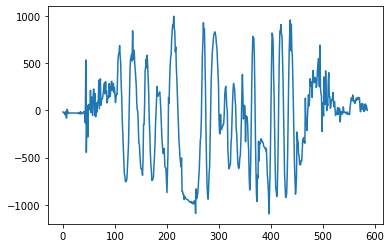

In [115]:
plt.plot(accX)

In [116]:
acc = np.array(acc)
gyro = np.array(gyro)
mag = np.array(mag)

In [117]:
acc = np.array(acc)
acc = (acc)/100
gyro = np.array(gyro)
#gyro = (gyro*0.0174532925)/1000
gyro = gyro/10000000
mag = np.array(mag)
mag = mag/10e7

In [118]:
acc = acc.reshape(len(accX),3)
# print(acc.shape)
gyro = gyro.reshape(len(gyroX),3)
# print(gyro.shape)
mag = mag.reshape(len(magX),3)

In [119]:
'''initial_orientation = np.array([[1,0,0],
                                [0,0,-1],
                                [0,1,0]])'''

initial_orientation = np.array([[1,0,0],
                                [0,1,0],
                                [0,0,1]])

initialPosition = [0,0,0]

rate = 25

In [165]:
pos1 = skinematics.imus.analytical(initial_orientation, gyro, initialPosition, acc, rate)

In [ ]:
pos1

#### Calculating the oriantation

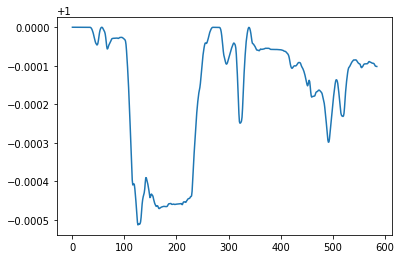

In [172]:
plt.plot(pos1[0][:,0])

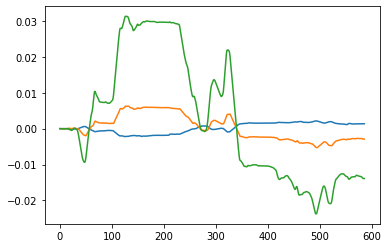

In [122]:
plt.plot(pos1[0][:,1:4])

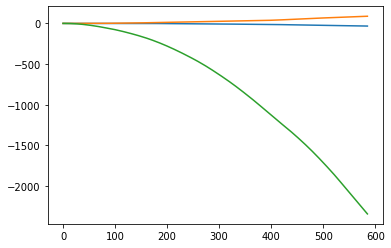

In [173]:
plt.plot(pos1[1])

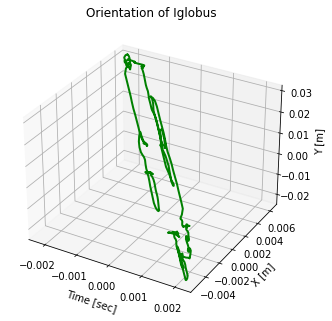

In [124]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
#dataSet = np.array([x_axis, y_axis, z_axis])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(pos1[0][:,1], pos1[0][:,2],pos1[0][:,3], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('Time [sec]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')
ax.set_title('Orientation of Iglobus')

plt.show()

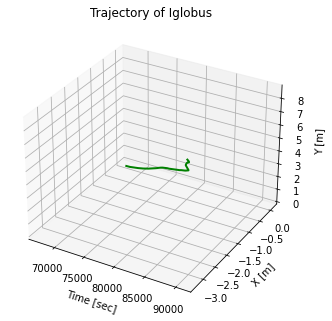

In [125]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
#dataSet = np.array([x_axis, y_axis, z_axis])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(test_data['T [ms]'], pos1[1][:,0]/10, pos1[1][:,1]/10, lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('Time [sec]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')
ax.set_title('Trajectory of Iglobus')

plt.show()

<Axes3DSubplot:title={'center':'Trajectory'}, xlabel='x', ylabel='y'>

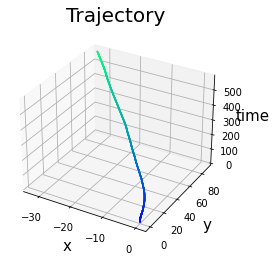

In [126]:
df = traja.TrajaDataFrame({"x": np.transpose(pos1[1][:,0]), "y": np.transpose(pos1[1][:,1])})
trj = traja.generate()
df.traja.plot_3d()

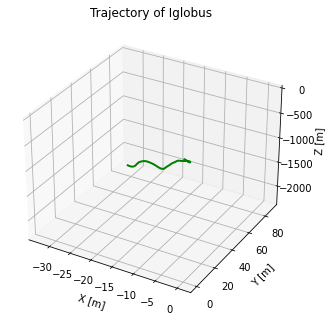

In [127]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
#dataSet = np.array([x_axis, y_axis, z_axis])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot( pos1[1][:,0], pos1[1][:,1],pos1[1][:,2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_zlabel('Z [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Trajectory of Iglobus')

plt.show()

In [128]:
in_file = path + file

In [129]:
data_label = pd.read_csv(path + file, encoding= 'unicode_escape')

In [130]:
in_data = {'rate':25.0,
        'acc': acc,
        'omega':gyro,
        'mag':mag}

In [131]:
initial_orientation = np.array([[1,0,0],
                                [0,1,0],
                                [0,0,1]])

In [132]:
my_sensor = MyOwnSensor(in_file=in_file, in_data=in_data)

In [133]:
my_sensor.set_qtype
my_sensor.set_qtype('madgwick')
oriantation = my_sensor.quat

Calculating the Quaternions [#########################] 586/586


In [134]:
oriantation

array([[ 0.9998003 , -0.00779622, -0.01209753,  0.01386455],
       [ 0.99922292, -0.02067299, -0.02032737,  0.02670184],
       [ 0.99827669, -0.0330677 , -0.02506366,  0.04149693],
       ...,
       [-0.31367311,  0.0349456 , -0.89430157,  0.31719502],
       [-0.329471  ,  0.02842619, -0.88958117,  0.31509705],
       [-0.3439384 ,  0.02400175, -0.88327482,  0.31773555]])

Text(0, 0.5, 'g')

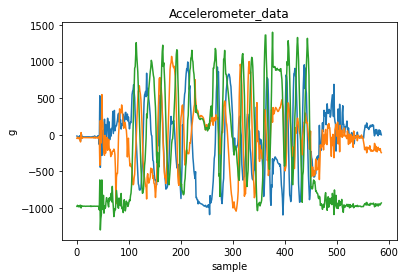

In [135]:
plt.plot(test_data['AccX [mg]'])
plt.plot(test_data['AccY [mg]'])
plt.plot(test_data['AccZ [mg]'])
plt.title('Accelerometer_data')
plt.xlabel('sample')
plt.ylabel('g')

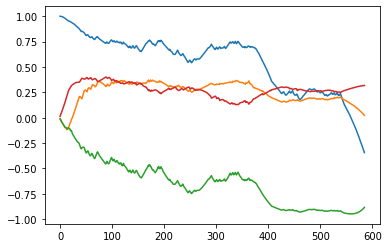

In [136]:
plt.plot(oriantation[:,0:4])

<Axes3DSubplot:title={'center':'Trajectory'}, xlabel='x', ylabel='y'>

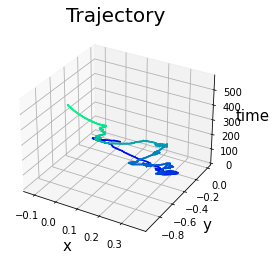

In [137]:
df = traja.TrajaDataFrame({"x": np.transpose(oriantation[:,1]), "y": np.transpose(oriantation[:,2]), "z": np.transpose(oriantation[:,3])})

trj = traja.generate()
df.traja.plot_3d()

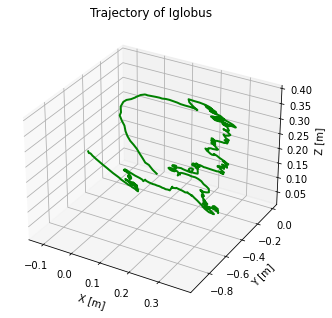

In [138]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
#dataSet = np.array([x_axis, y_axis, z_axis])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(oriantation[:,1], oriantation[:,2],oriantation[:,3], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_zlabel('Z [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Trajectory of Iglobus')

plt.show()

In [139]:
## doubt
#rate = 50.0
initialPosition = [0,0,0]

In [140]:
scaler = skinematics.quat.q_scalar(my_sensor.quat)

In [141]:
vector_part = skinematics.quat.q_vector(my_sensor.quat)
euler_angle = skinematics.quat.quat2seq(my_sensor.quat, seq='Fick')  #returns angles in degrees in Fick … Rz * Ry * Rx
my_sensor.calc_position()

In [142]:
pos = my_sensor.pos
vel = my_sensor.vel

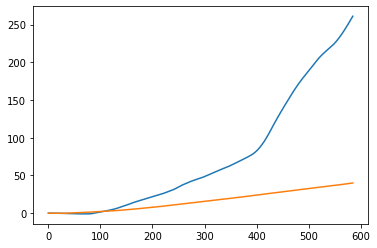

In [143]:
#skinematics.view.Orientation_OGL(oriantation,25)
plt.plot(pos[:,0:2])

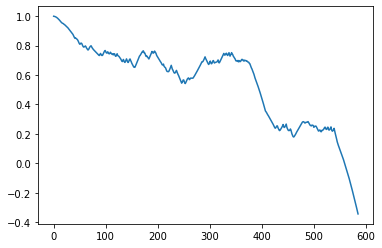

In [144]:
plt.plot(oriantation[:,0])

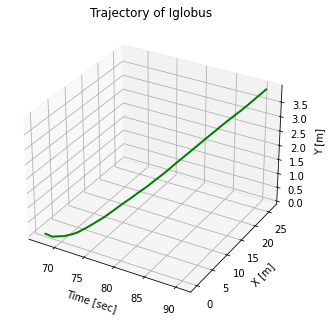

In [145]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(test_data['T [ms]']/1000,pos[:,0]/10, pos[:,1]/10, lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('Time [sec]')
ax.set_ylabel('X [m]')
ax.set_zlabel('Y [m]')
ax.set_title('Trajectory of Iglobus')

plt.show()

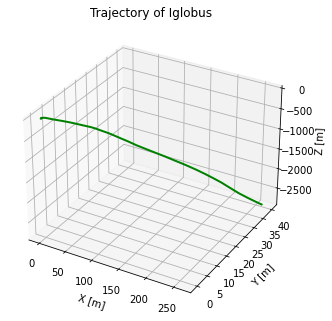

In [146]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(pos[:,0], pos[:,1],pos[:,2], lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_zlabel('Z [m]')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Trajectory of Iglobus')

plt.show()

<Axes3DSubplot:title={'center':'Trajectory'}, xlabel='x', ylabel='y'>

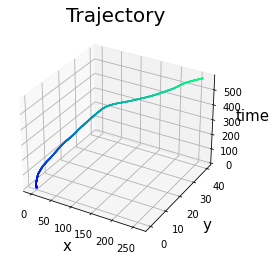

In [147]:
df = traja.TrajaDataFrame({"x": np.transpose(pos[:,0]), "y": np.transpose(pos[:,1])})

trj = traja.generate()
df.traja.plot_3d()

In [148]:
legend_Euler = ['roll','pitch','yaw']
legend_quaternion = ['w','x','y','z']
legend_vector = ['x','y','z']

In [149]:
initial = np.zeros((3,1))
initial[0] = acc[0,0]
initial[1] = acc[0,1]
initial[2] = acc[0,2]

In [150]:
rotation = []

r = 0.1 # in m
initialacc = np.zeros((3,1))
initialacc[0] = acc[0,0]
initialacc[1] = acc[0,1]
initialacc[2] = acc[0,2]

In [151]:
distanceX = 0
distanceY = 0
distanceZ = 0

In [152]:
def estimate_orientation(a, w, t, alpha=0.9, g_ref=(0., 0., 1.),
                         theta_min=1e-6, highpass=.01, lowpass=.05):
    """ Estimate orientation with a complementary filter.
    Fuse linear acceleration and angular velocity measurements to obtain an
    estimate of orientation using a complementary filter as described in
    `Wetzstein 2017: 3-DOF Orientation Tracking with IMUs`_
    .. _Wetzstein 2017: 3-DOF Orientation Tracking with IMUs:
    https://pdfs.semanticscholar.org/5568/e2100cab0b573599accd2c77debd05ccf3b1.pdf
    Parameters
    ----------
    a : array-like, shape (N, 3)
        Acceleration measurements (in arbitrary units).
    w : array-like, shape (N, 3)
        Angular velocity measurements (in rad/s).
    t : array-like, shape (N,)
        Timestamps of the measurements (in s).
    alpha : float, default 0.9
        Weight of the angular velocity measurements in the estimate.
    g_ref : tuple, len 3, default (0., 0., 1.)
        Unit vector denoting direction of gravity.
    theta_min : float, default 1e-6
        Minimal angular velocity after filtering. Values smaller than this
        will be considered noise and are not used for the estimate.
    highpass : float, default .01
        Cutoff frequency of the high-pass filter for the angular velocity as
        fraction of Nyquist frequency.
    lowpass : float, default .05
        Cutoff frequency of the low-pass filter for the linear acceleration as
        fraction of Nyquist frequency.
    Returns
    -------
    q : array of quaternions, shape (N,)
        The estimated orientation for each measurement.
    """

    # initialize some things
    N = len(t)
    dt = np.diff(t)
    g_ref = np.array(g_ref)
    q = np.ones(N, dtype=quaternion)

    # get high-passed angular velocity
    w = filtfilt(*butter(5, highpass, btype='high'), w, axis=0)
    w[np.linalg.norm(w, axis=1) < theta_min] = 0
    q_delta = from_rotation_vector(w[1:] * dt[:, None])

    # get low-passed linear acceleration
    a = filtfilt(*butter(5, lowpass, btype='low'), a, axis=0)

    for i in range(1, N):

        # get rotation estimate from gyroscope
        q_w = q[i - 1] * q_delta[i - 1]

        # get rotation estimate from accelerometer
        v_world = rotate_vectors(q_w, a[i])
        n = np.cross(v_world, g_ref)
        phi = np.arccos(np.dot(v_world / np.linalg.norm(v_world), g_ref))
        q_a = from_rotation_vector(
            (1 - alpha) * phi * n[None, :] / np.linalg.norm(n))[0]

        # fuse both estimates
        q[i] = q_a * q_w

    return q

In [153]:
def dcX(l):
    x = l[0]
    y = l[1]
    z = l[2]
    return x/((x**2 + y**2 + z**2)**0.5)

def dcY(l):
    x = l[0]
    y = l[1]
    z = l[2]
    return y/((x**2 + y**2 + z**2)**0.5)

def dcZ(l):
    x = l[0]
    y = l[1]
    z = l[2]
    return z/((x**2 + y**2 + z**2)**0.5)

In [154]:
X = 0
Y = 0
Z = 0

Xa = 0
Ya = 0
Za = 0
distanceX = []
distanceY = []
distanceZ = []

positionX = []
positionY = []
positionZ = []

arr = np.array([[1 ,0, 0],
                [0 ,1 ,0],
                [0 ,0 ,1]])

angles = []

x = 0
rotateTimes = 0

time = 0.04
dRotateprev = 0

In [155]:
my_sensor.set_qtype
# my_sensor.set_qtype('mahony')
q_Kalman = my_sensor.quat

In [156]:
for i, j,k in zip(scaler,acc,q_Kalman):

      #dRotate is the difference in angle rotated for each frame
    dRotate = math.degrees(2*np.arccos(i))/360
      # instant_angle = dRotate - dRotateprev
      # dist = instant_angle * 2 * np.pi* r
    dist = dRotate * 2 * np.pi* r

      # dRotateprev = dRotate

      # rotateTimes = rotateTimes + instant_angle
    rotateTimes = rotateTimes + dRotate
      # print(instant_angle)

      # x = x + 2*np.arccos(i)

    angles.append(math.degrees(2*np.arccos(i)))
    rotation.append(rotateTimes)


    j1 = skinematics.vector.rotate_vector(j, k)
      # j1[2] = j1[2] - constants.g  # units in milli-g which is 1/1000th of g
    j = skinematics.vector.normalize(j1)
      # print(j)

      # print(j)
    X = X + dist*dcX(j)
    Y = Y + dist*dcY(j)
    Z = Z + dist*dcZ(j)
    distanceX.append(dist*dcX(j))
    distanceY.append(dist*dcY(j))
    distanceZ.append(dist*dcZ(j))
    positionX.append(X)
    positionY.append(Y)
    positionZ.append(Z)

In [157]:
positionX = np.array(positionX)
positionY = np.array(positionY)
positionZ = np.array(positionZ)

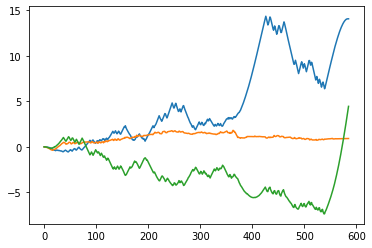

In [158]:
plt.plot(positionX)
plt.plot(positionY)
plt.plot(positionZ)

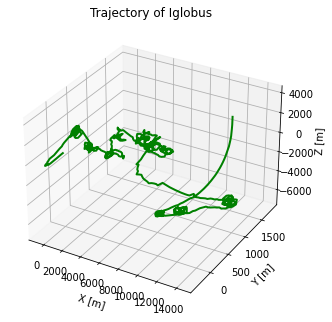

In [159]:
fig = plt.figure()
ax = Axes3D(fig)
numDataPoints = len(test_data['T [ms]'])
# NOTE: Can't pass empty arrays into 3d version of plot()
line = plt.plot(1000*positionX, 1000*positionY, 1000*positionZ, lw=2, c='g')[0] # For line plot
 
# AXES PROPERTIES]
# ax.set_xlim3d([limit0, limit1])
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_zlabel('Z [m]')
ax.set_title('Trajectory of Iglobus')
plt.show()

In [160]:
def get_arrow_acc(i,quaternion):

    initialacc = np.array([acc[i,0],acc[i,1],acc[i,2]])

    q = np.array(quaternion[i])
    initialacc = skinematics.vector.rotate_vector(initialacc,q)
    # initialacc = np.dot(rm,initialacc)
    norm1 = np.linalg.norm(initialacc)
    initialacc = initialacc/norm1
    # print(initial)
    x = 0
    y = 0
    z = 0
    u = initialacc[0]
    v = initialacc[1]
    w = initialacc[2]
    return x,y,z,u,v,w

def get_arrow_Quaternion(i):
    q = q_Kalman[i]
    x = 0
    y = 0
    z = 0
    u = q[1]
    v = q[2]
    w = q[3]
    return x,y,z,u,v,w

def no_of_rotations(i=0):
    global rotation
    return rotation[i]

def plot_trajectory(positionX, positionY, positionZ,rotation):
    def func(num, dataSet, line):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(dataSet[0:2, :num])
        line.set_3d_properties(dataSet[2, :num])
        # t2.set_position((dataSet[0:2,num]))
        t.set_text(str(rotation[num]))
        # print(num)
        return line

    dataSet = np.array([positionX, positionY, positionZ])
    numDataPoints = len(positionZ)

    # GET SOME MATPLOTLIB OBJECTS
    fig = plt.figure()
    ax = p3.Axes3D(fig)
    t = ax.text(-2,-2,-1.5, str(no_of_rotations(0)))

    # NOTE: Can't pass empty arrays into 3d version of plot()
    line = plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot

    # AXES PROPERTIES]
    # ax.set_xlim3d([limit0, limit1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Trajectory of ball')

    # Creating the Animation object
    line_ani = animation.FuncAnimation(fig, func,frames=numDataPoints, fargs=(dataSet,line), interval=1, blit=False)
    #line_ani.save(r'AnimationNew.mp4')

    def on_press(event):
        if event.key.isspace():
            if anim.running:
                anim.event_source.stop()
            else:
                anim.event_source.start()
            anim.running ^= True

    plt.legend(['position'])
    plt.show()

In [161]:
def plot_trajectory_no(positionX, positionY, positionZ):

    dataSet = np.array([positionX, positionY, positionZ])
    # numDataPoints = len(positionZ)

    # GET SOME MATPLOTLIB OBJECTS
    fig1 = plt.figure()
    ax1 = p3.Axes3D(fig1)

    # NOTE: Can't pass empty arrays into 3d version of plot()
    plt.plot(dataSet[0], dataSet[1], dataSet[2], lw=2, c='g')[0] # For line plot

    t2 = ax1.text(-2,-6,-800, str(no_of_rotations(len(rotation) - 1)))

    # AXES PROPERTIES]
    # ax.set_xlim3d([limit0, limit1])
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('Trajectory of ball')

    plt.show()

def angle_between_vectors(func1,func2,vector_part,t1 = 0,t2 = 0):
    l,m,n,a,b,c = func1(t1,vector_part)
    l1,m1,n1,a1,b1,c1 = func2(t2)

    vector_1 = np.array([a,b,c])
    vector_2 = np.array([a1,b1,c1])

    return np.degrees(skinematics.vector.angle(vector_1,vector_2))

def Plot_quat_acc(vector_part):
    # t1.set_position((1.5,1.5))
    fig1, ax1 = plt.subplots(subplot_kw=dict(projection="3d"))

    quiver_quat = ax1.quiver(*get_arrow_Quaternion(0),normalize = True,color='b', label='Quaternion')
    # quiver_orient = ax1.quiver(*get_arrow_Orienation(0),normalize = True,color='g', label='orientation')
    quiver_acc = ax1.quiver(*get_arrow_acc(0,vector_part),color='r', label='acceleration')

    # t1 = ax1.text(-1.5,-1.5,-1.5, str(angle_between_vectors(get_arrow_Orienation,get_arrow_acc)))
    t2 = ax1.text(-2,-2,-1.5, str(angle_between_vectors(get_arrow_acc,get_arrow_Quaternion,vector_part)))
    # t1.set_text(str(quiver_acc.val))
    print(str(angle_between_vectors(get_arrow_acc,get_arrow_Quaternion,vector_part)))

    def update_quat_acc(t):
        nonlocal quiver_quat
        quiver_quat.remove()
        quiver_quat = ax1.quiver(*get_arrow_Quaternion(t),color='b', label='Quaternion')

        # nonlocal quiver_orient
        # quiver_orient.remove()
        # quiver_orient = ax1.quiver(*get_arrow_Orienation(t),color='g', label='orientation')

        nonlocal quiver_acc
        quiver_acc.remove()
        quiver_acc = ax1.quiver(*get_arrow_acc(t,vector_part),color='r', label='acceleration')

        ###----------------------print text---------------


        # update the value of the Text object
        # tpos = int(0.25*x.shape[0])
        # t1.set_position((-1.5,-1.5,-1.5))
        # t1.set_text(str(angle_between_vectors(get_arrow_Orienation,get_arrow_acc,t,t)))
        t2.set_position((-2,-2,-1.5))
        t2.set_text(str(angle_between_vectors(get_arrow_acc,get_arrow_Quaternion,vector_part,t,t)))
        if(angle_between_vectors(get_arrow_acc,get_arrow_Quaternion,vector_part,t,t) == 90):
            print(angle_between_vectors(get_arrow_acc,get_arrow_Quaternion,vector_part,t,t))
        # tpos = int(0.75*x.shape[0])
        # t2.set_position((x[tpos], f[tpos]))
        # t2.set_text(str(slider1.val))

        ###----------------------print text---------------

    def update_time():

        t = 0
        t_max = len(q_Kalman)
        while t<t_max:
            t += anim.direction
            yield t

    def on_press(event):
        if event.key.isspace():
            if anim.running:
                anim.event_source.stop()
            else:
                anim.event_source.start()
            anim.running ^= True

    ax1.set_xlim(-2, 2)
    ax1.set_ylim(-2, 2)
    ax1.set_zlim(-2, 2)
    speed = 20

    fig1.canvas.mpl_connect('key_press_event', on_press)

    anim = animation.FuncAnimation(fig1, update_quat_acc, frames=update_time,interval=50, repeat=True)
    #pause
    anim.running = True
    anim.direction = +1
    plt.legend()
    plt.show()